[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Fri Jan 24 14:37:59 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = "/content/drive/MyDrive/yolov11_2.0"
print(HOME)

/content/drive/MyDrive/yolov11_2.0


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
%cd {HOME}
!pip install roboflow

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="M11OK0bZkXvcy3y2hb2k")
project = rf.workspace("computer-vision-2024-assignment").project("waste-bag-detection")
version = project.version(3)
dataset = version.download("yolov11")


/content/drive/MyDrive/yolov11 2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-Bag-Detection-3 in yolov11:: 100%|██████████| 1934/1934 [00:22<00:00, 84.82it/s] 


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data=/content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/data.yaml epochs=100 imgsz=640 plots=True

[Errno 2] No such file or directory: '/content/drive/MyDrive/yolov11 2.0'
/content/drive/MyDrive/yolov11 2.0
100% 18.4M/18.4M [00:00<00:00, 156MB/s]
New https://pypi.org/project/ultralytics/8.3.67 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch4951.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch4952.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1737729773.f1fc52057c7d.2501.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	 weights
P_curve.png					    train_batch4950.jpg


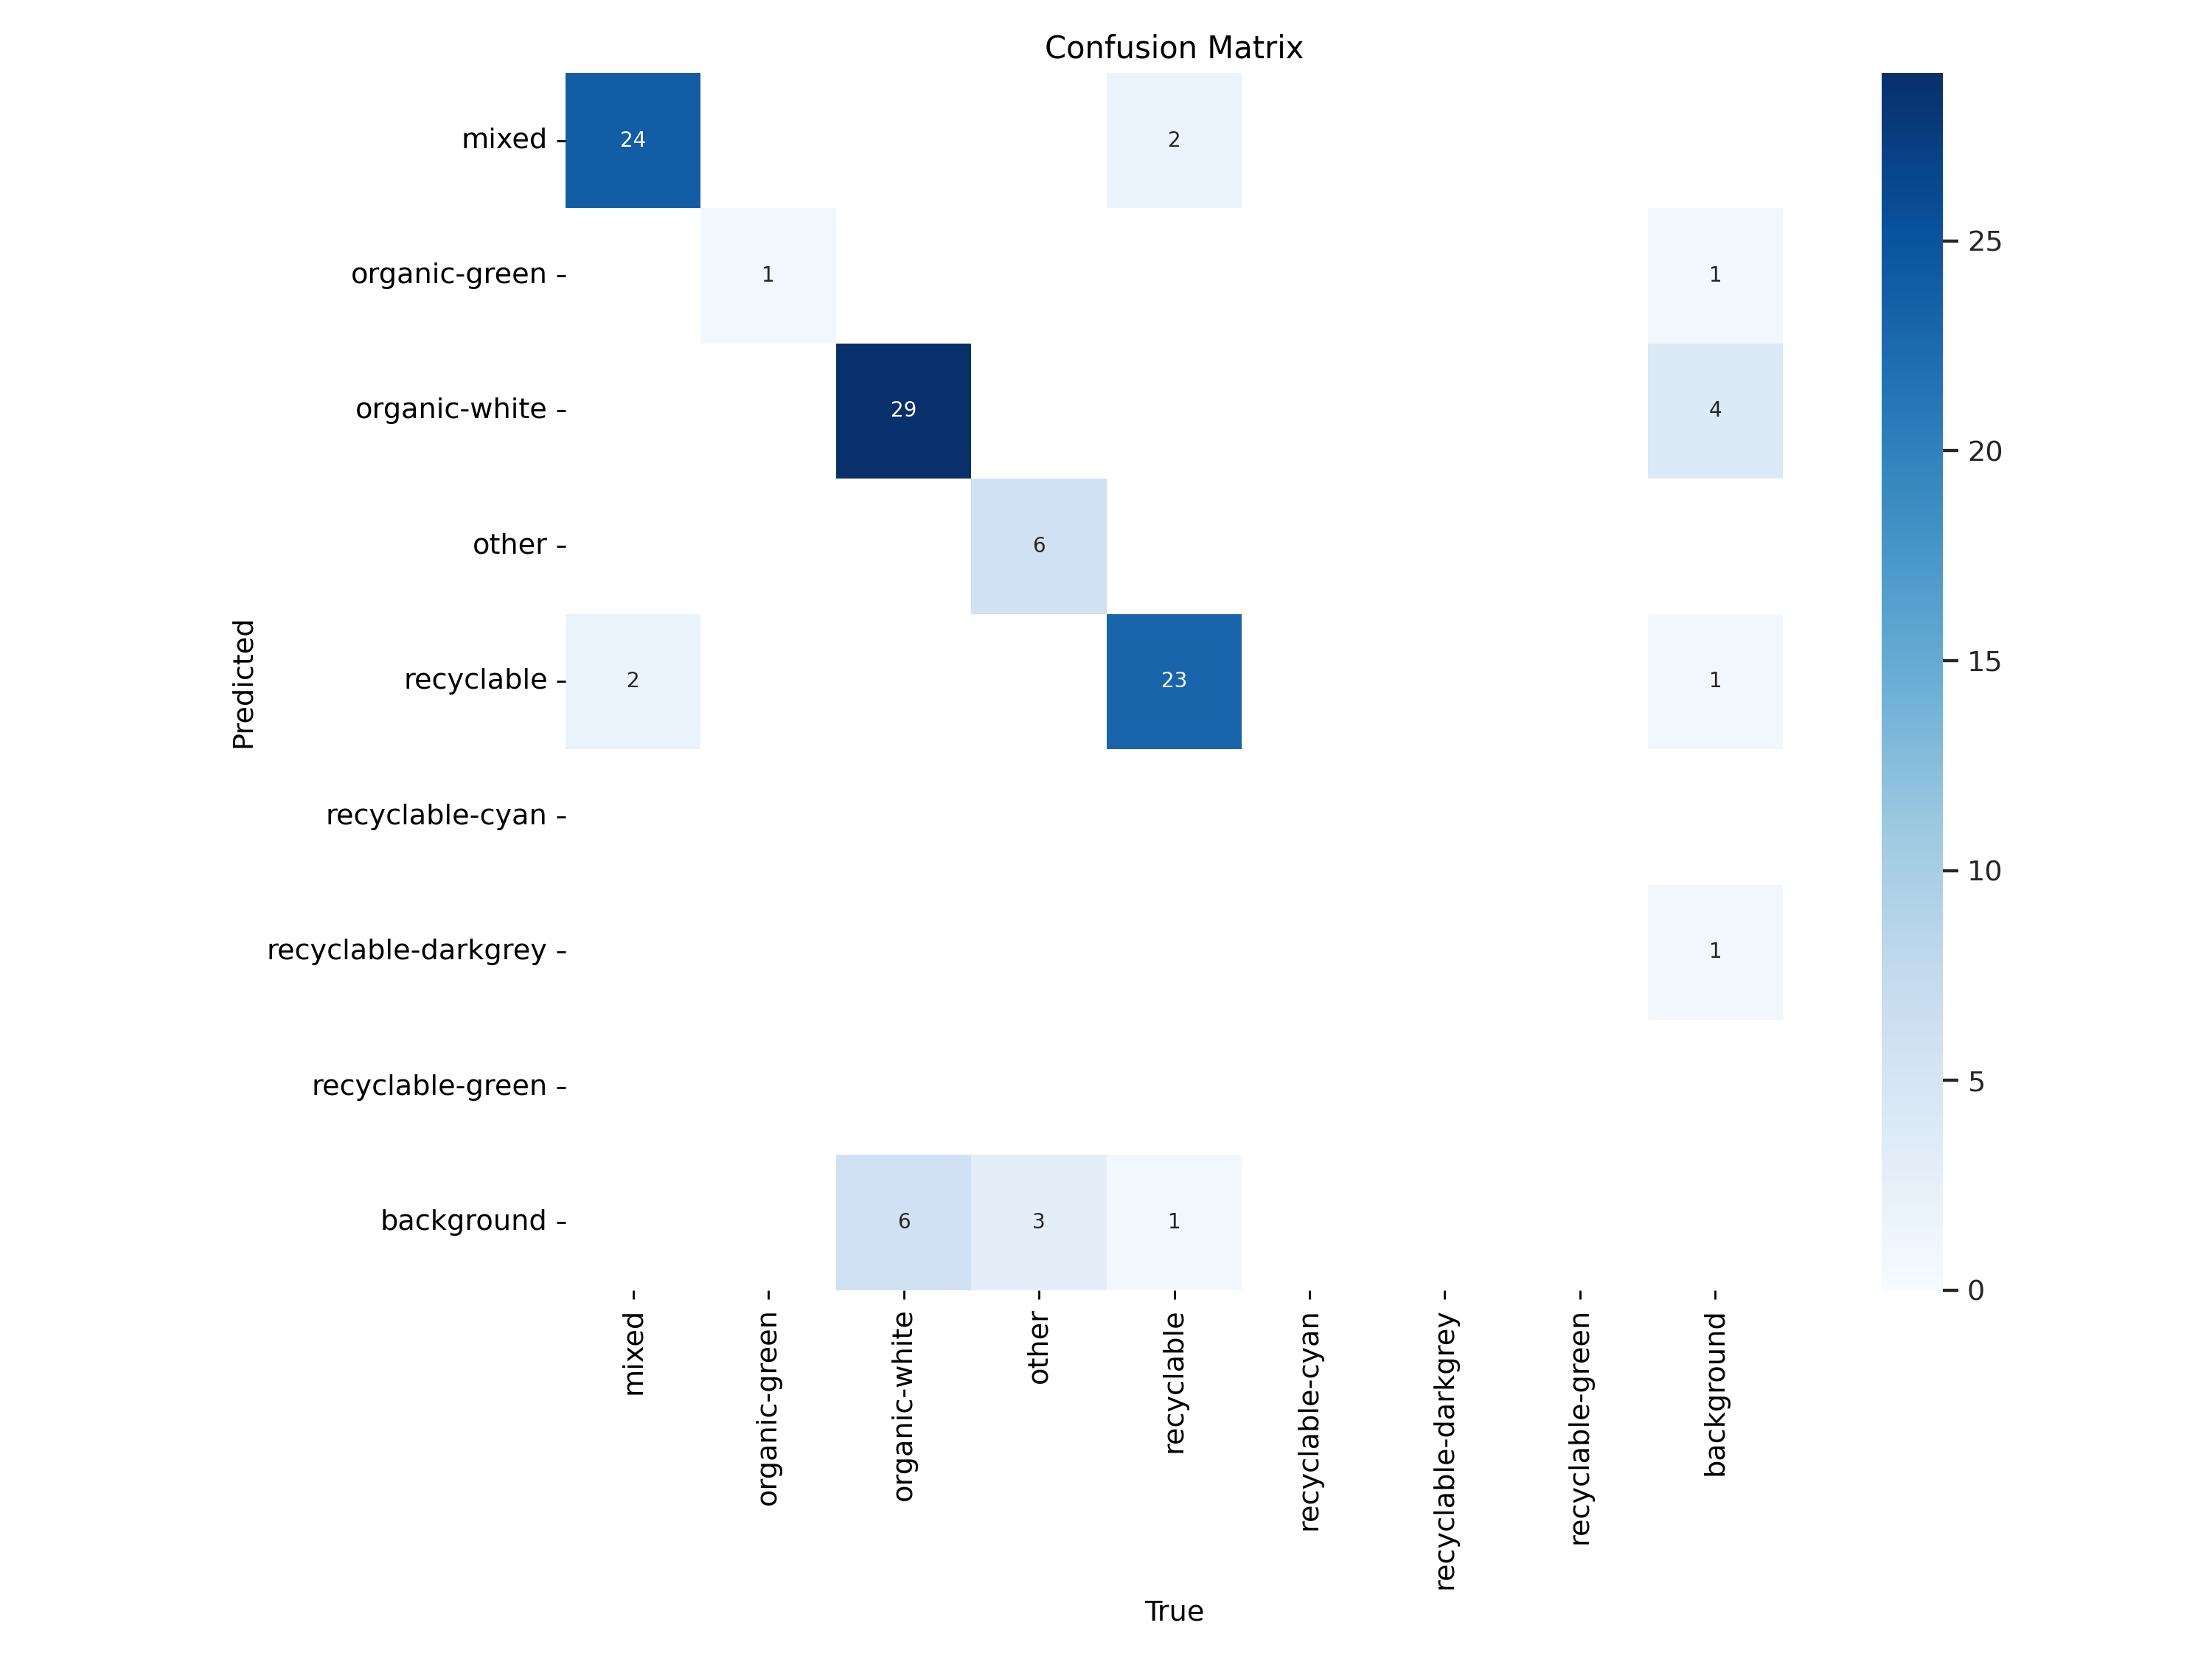

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

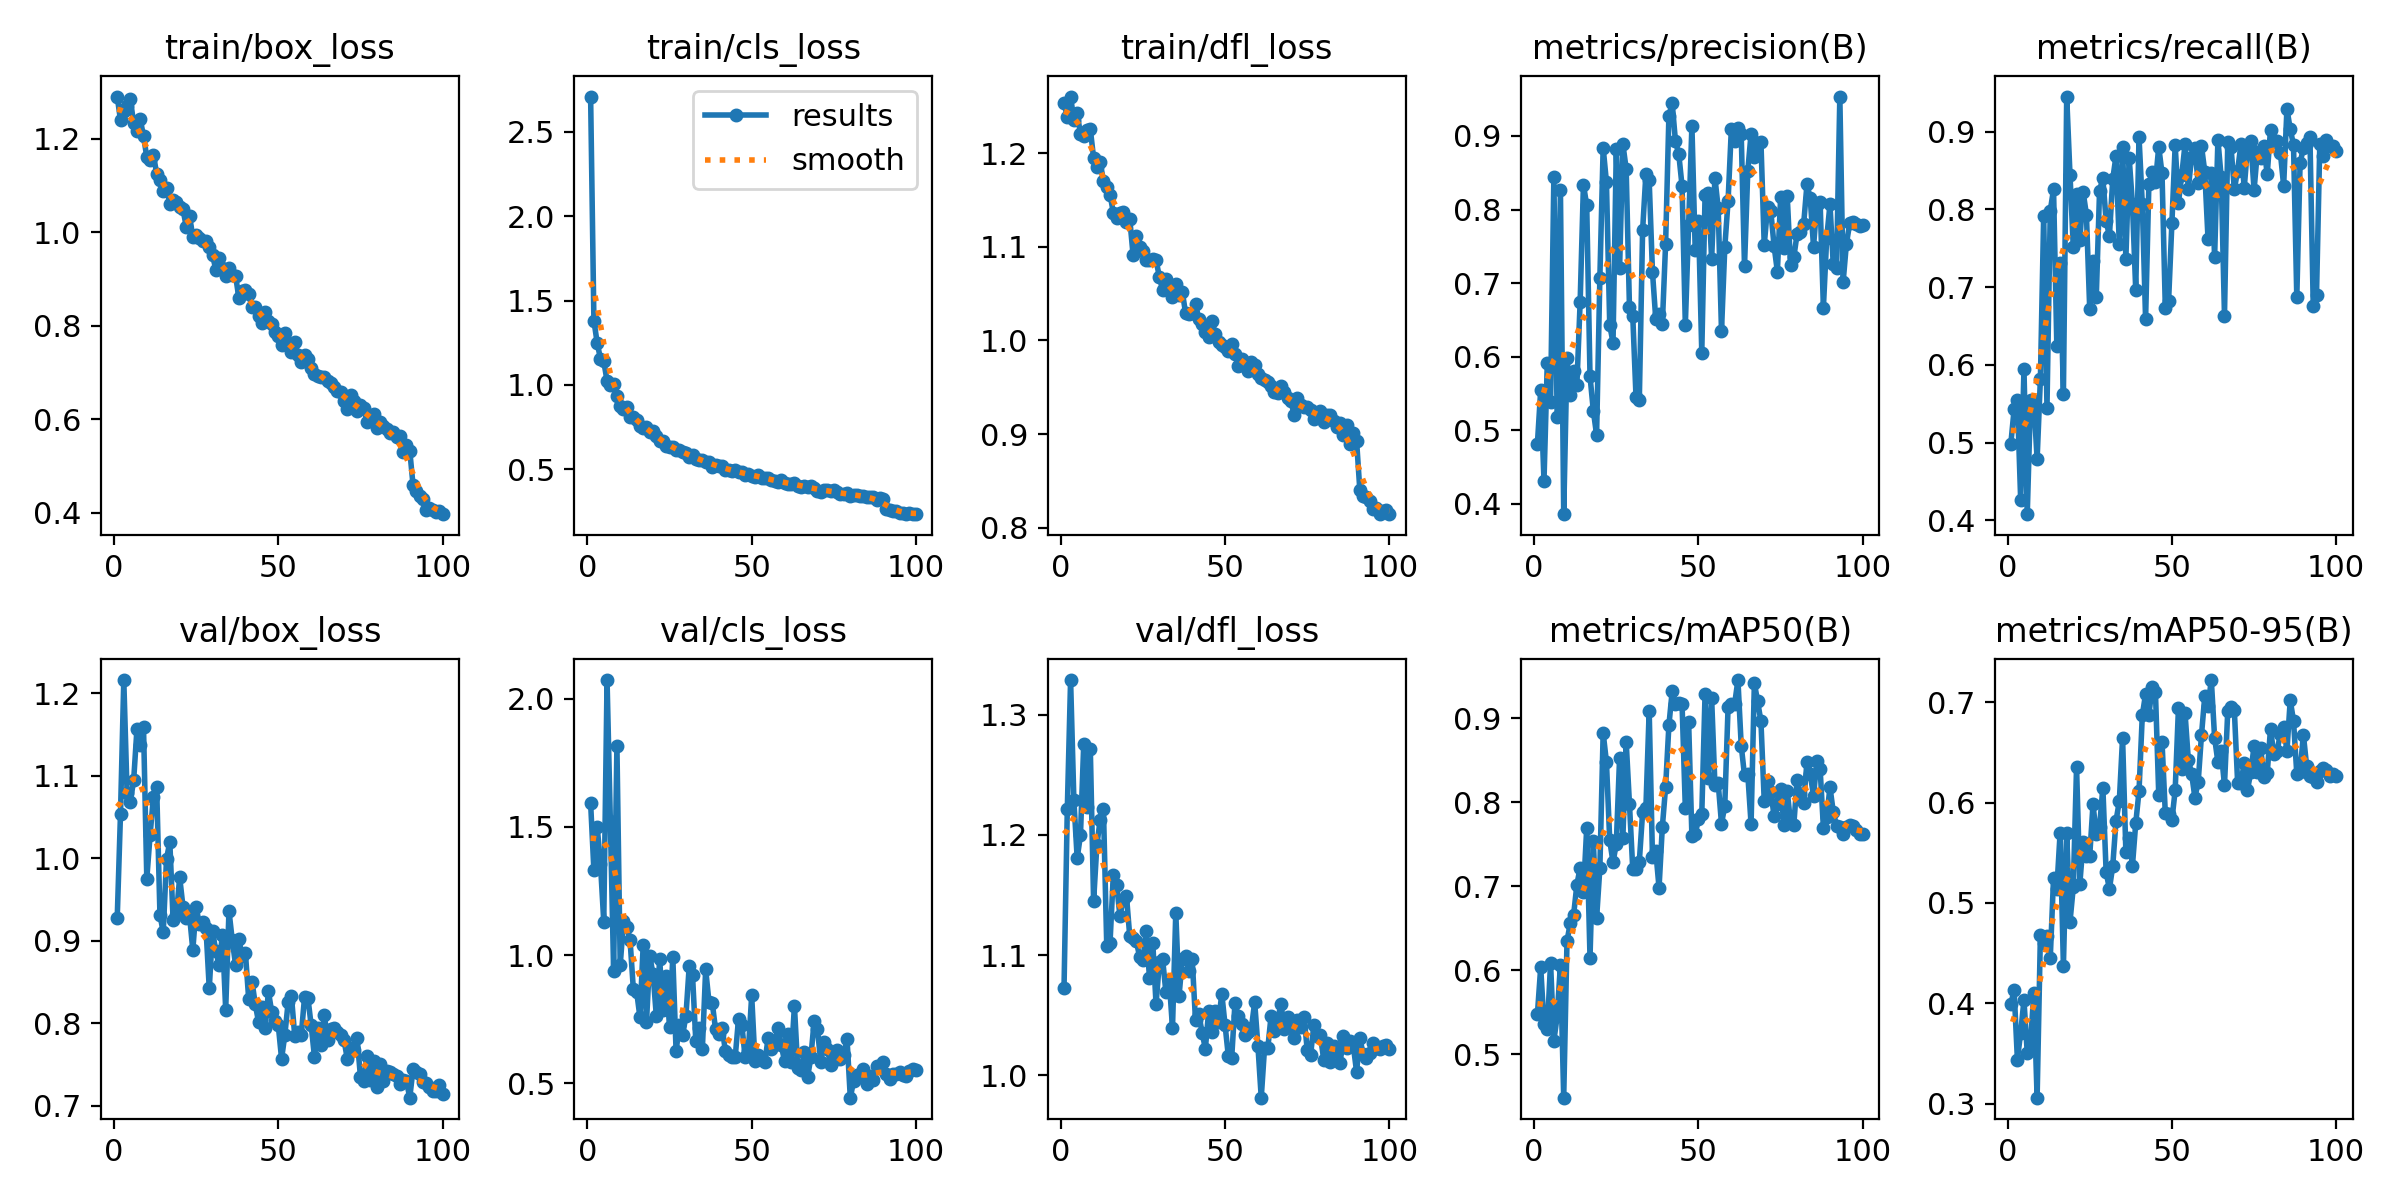

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

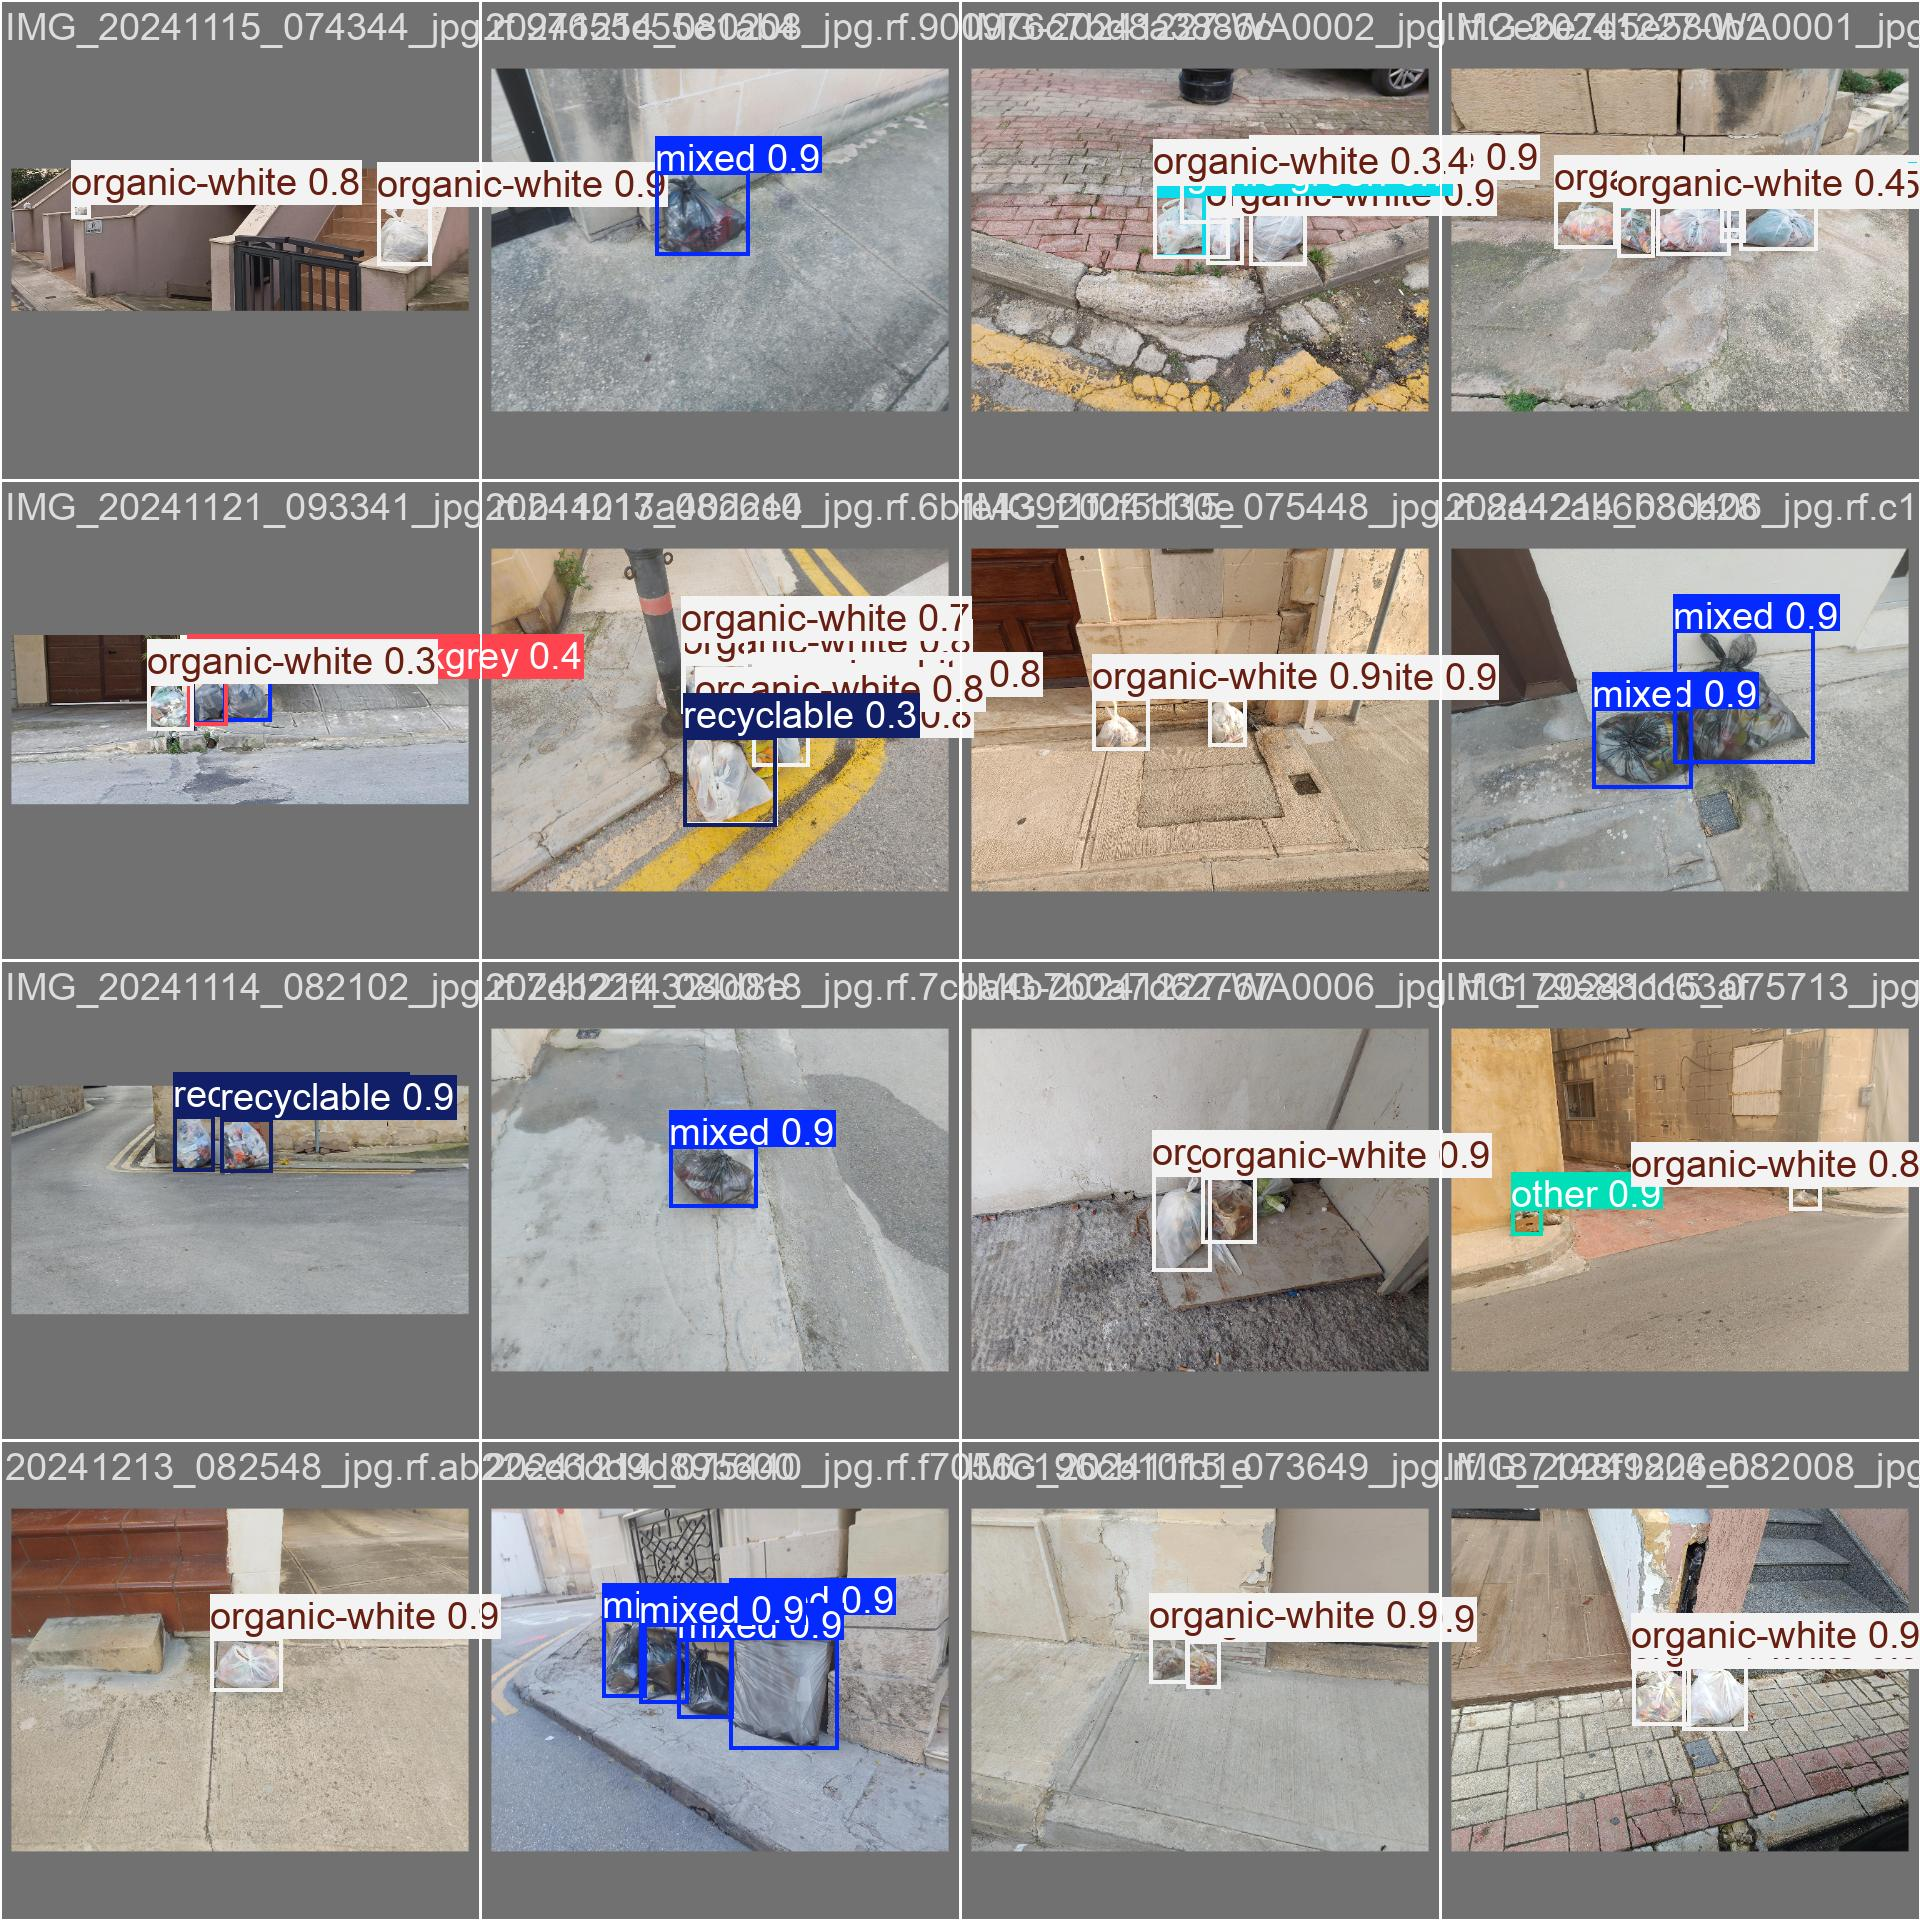

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/Waste-Bag-Detection-3/data.yaml plots=True save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.15it/s]
                   all         45         97      0.896       0.85      0.942      0.695
                 mixed         15         26      0.911      0.923      0.975      0.772
         organic-green          1          1      0.721          1      0.995      0.597
         organic-white         13         35      0.963      0.754       0.94      0.632
                 other          7          9          1      0.689      0.862      0.713
            recyclable         17         26      0.883      0.885      0.936      0.761
Speed: 4.3ms prepr

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/Waste-Bag-Detection-3/test/images plots=True save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/36 /content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/test/images/20241213_080718_jpg.rf.35285f5f0593610f73958c0615761166.jpg: 608x640 5 mixeds, 78.7ms
image 2/36 /content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/test/images/20241214_081012_jpg.rf.2983c96c19c3852cad3307650f8c5266.jpg: 480x640 1 mixed, 86.1ms
image 3/36 /content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/test/images/20241214_081134_jpg.rf.226a16aaa590de9b982f56ec6db51342.jpg: 640x480 5 mixeds, 84.5ms
image 4/36 /content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/test/images/20241214_081423_jpg.rf.0b75e7e5a82c905d3d78d0e3fd6c90c2.jpg: 640x480 6 mixeds, 12.4ms
image 5/36 /content/drive/MyDrive/yolov11_2.0/Waste-Bag-Detection-3/test/images/20241219_083938_jpg.rf.30444bf64939895b60fb6dd9f77827ed.jpg: 640x480 1 other, 1 recyclable

**NOTE:** Let's take a look at few results.

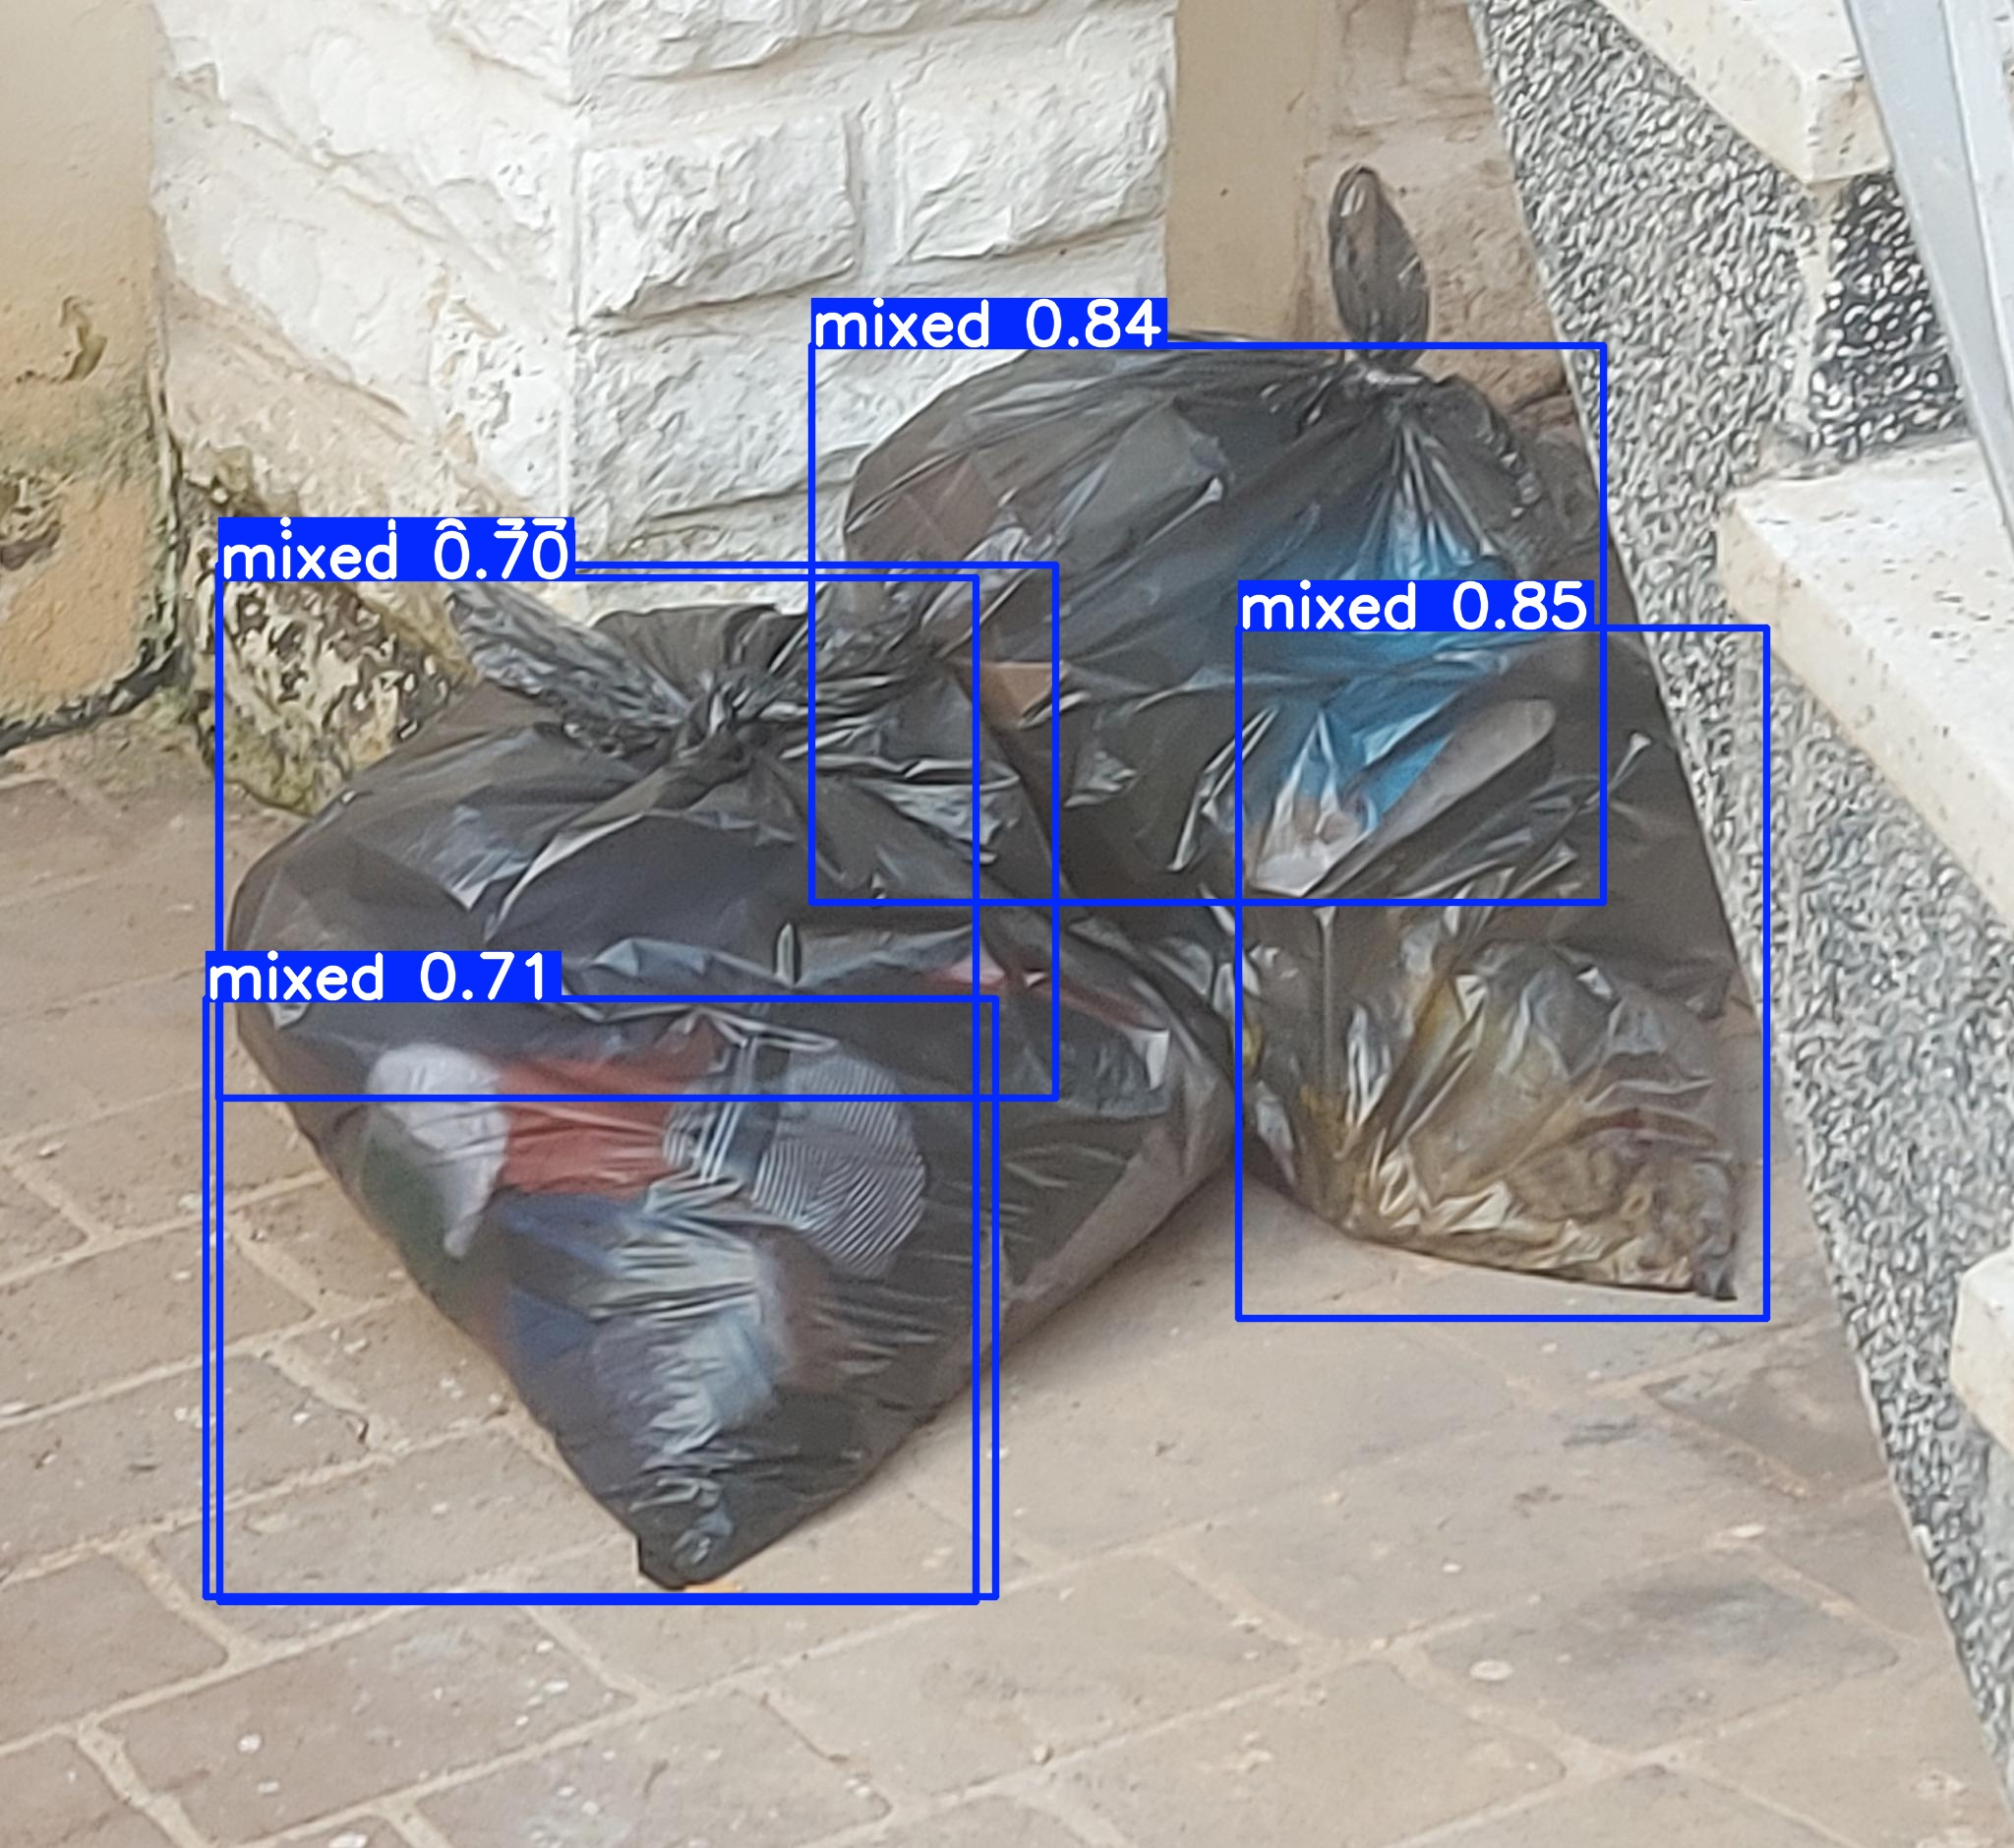

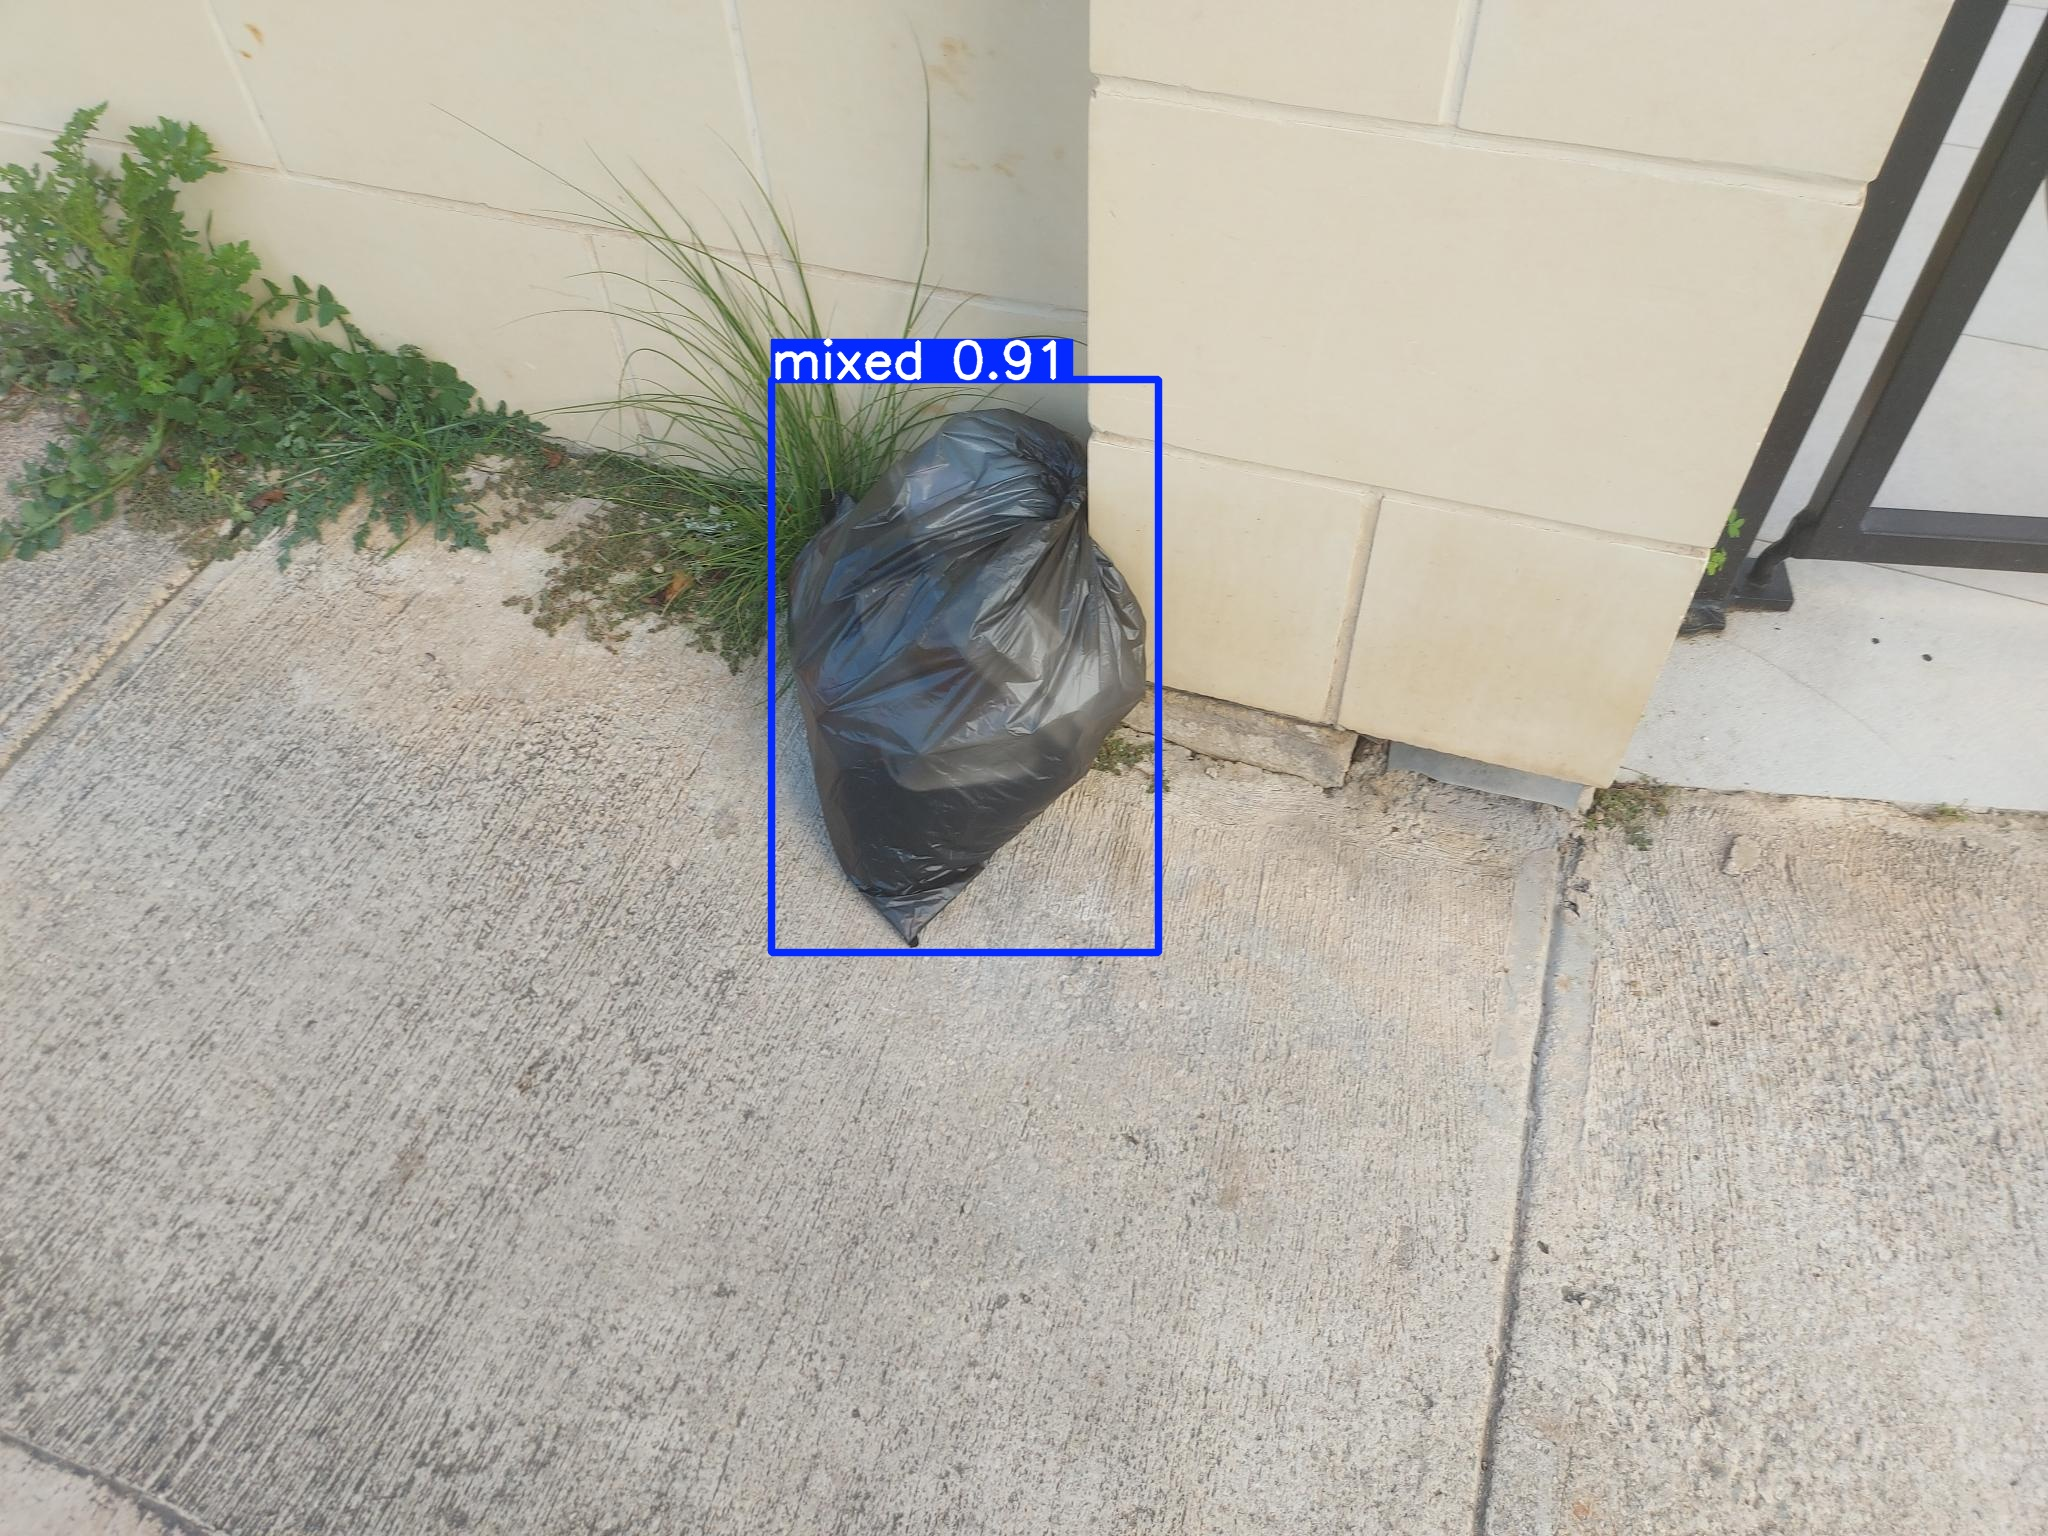

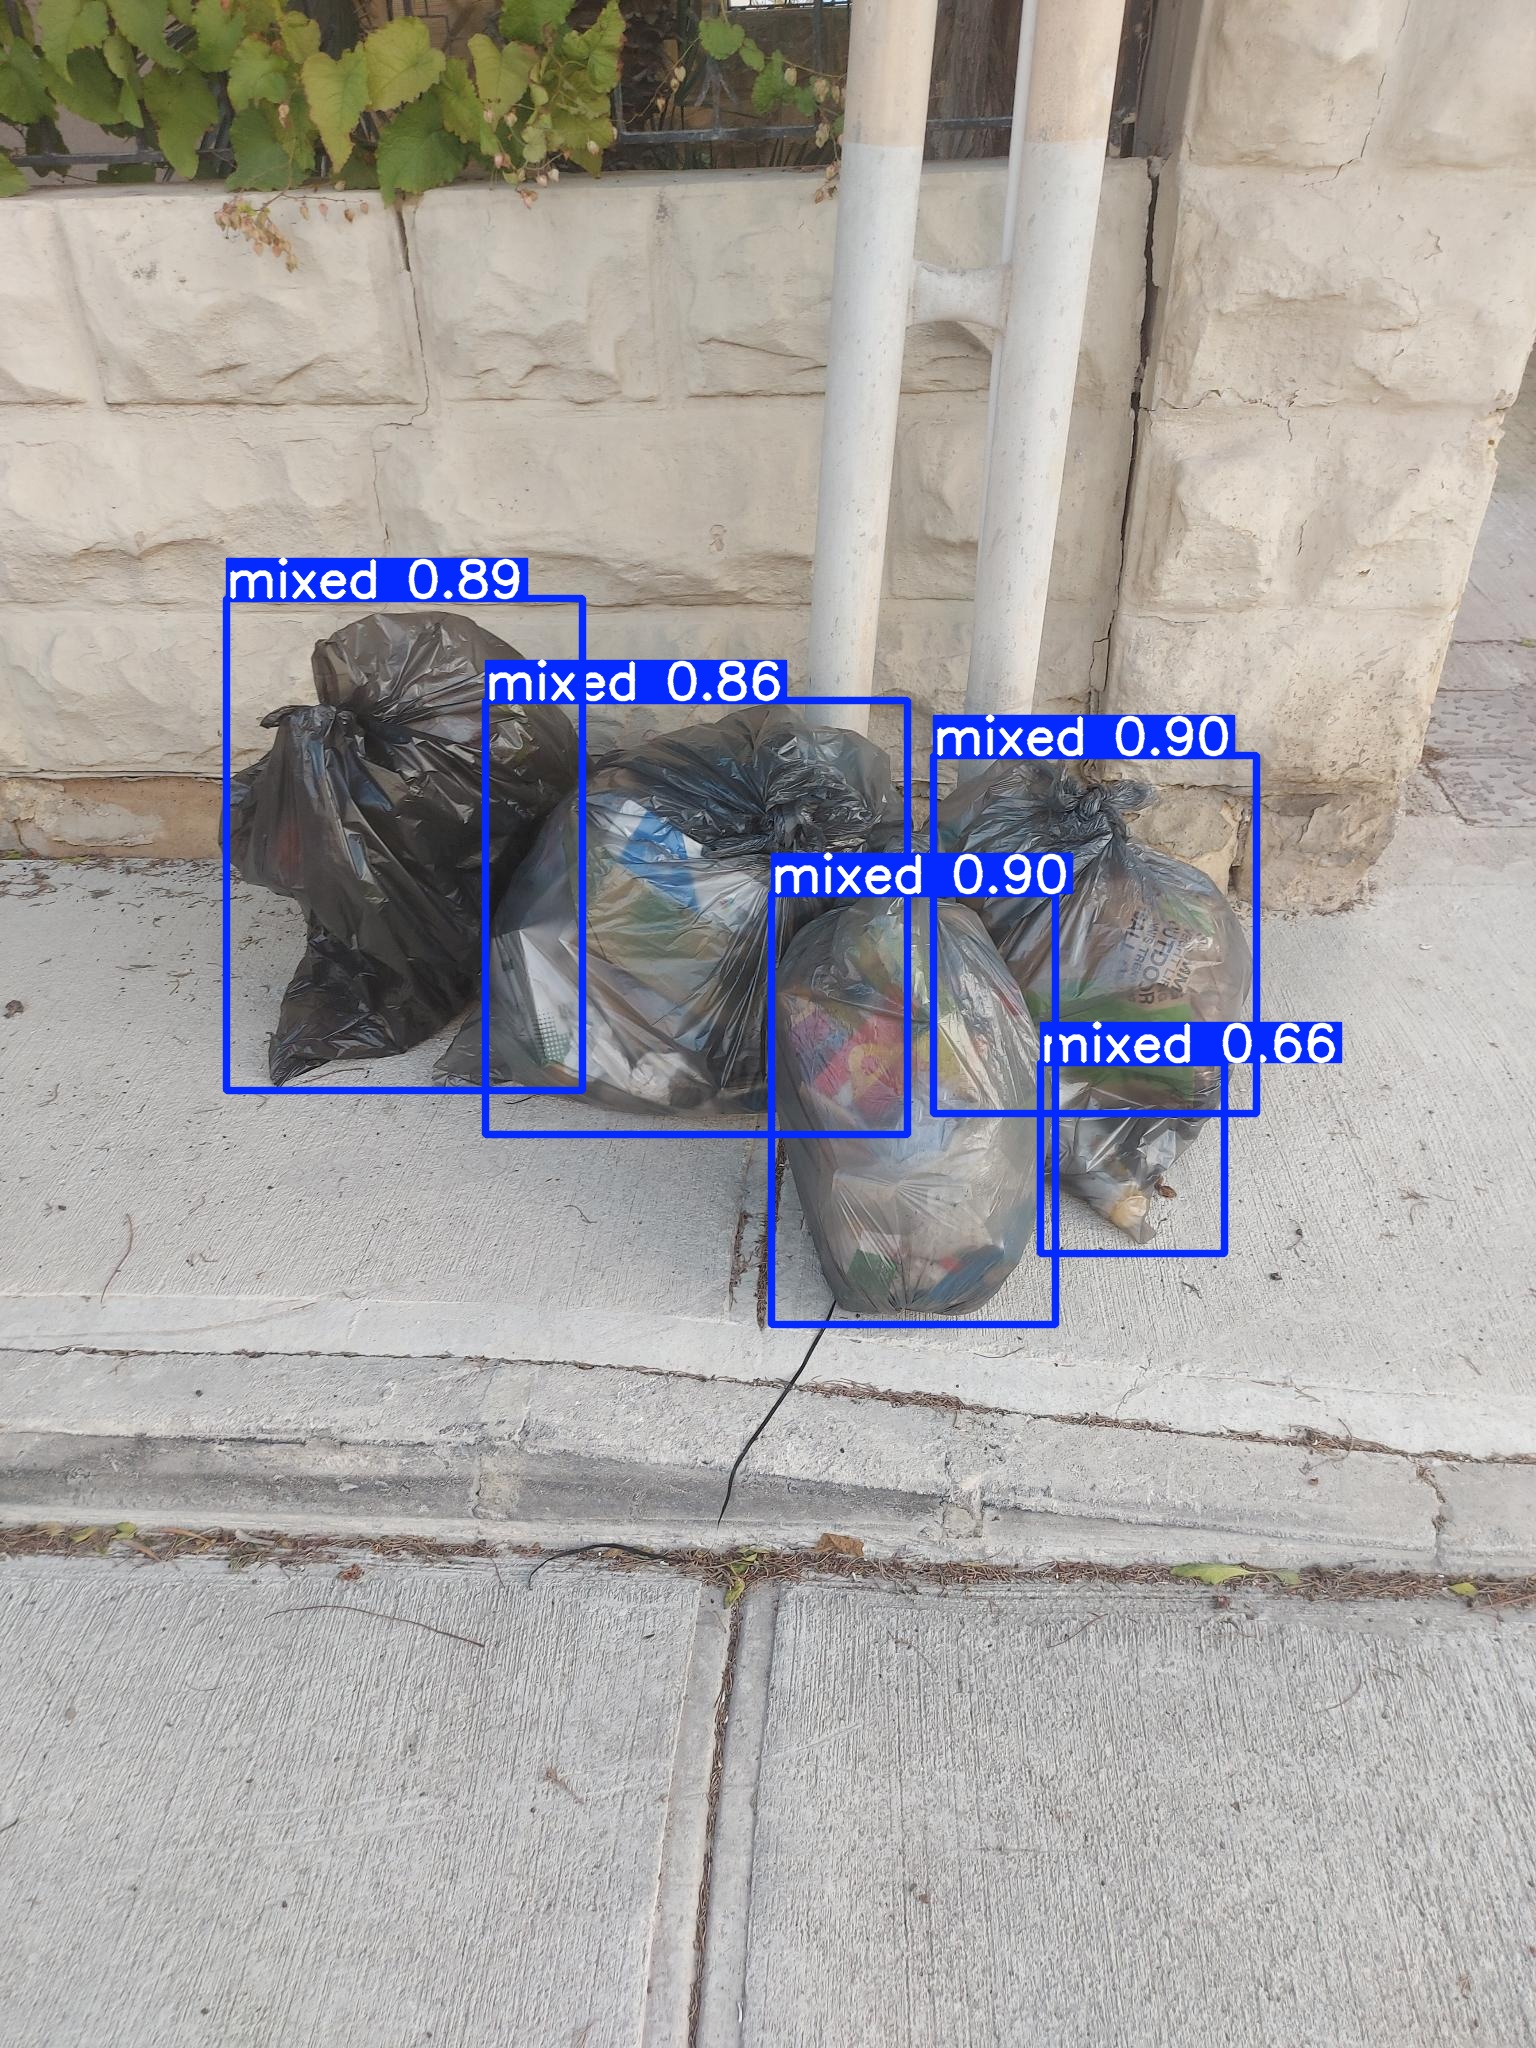

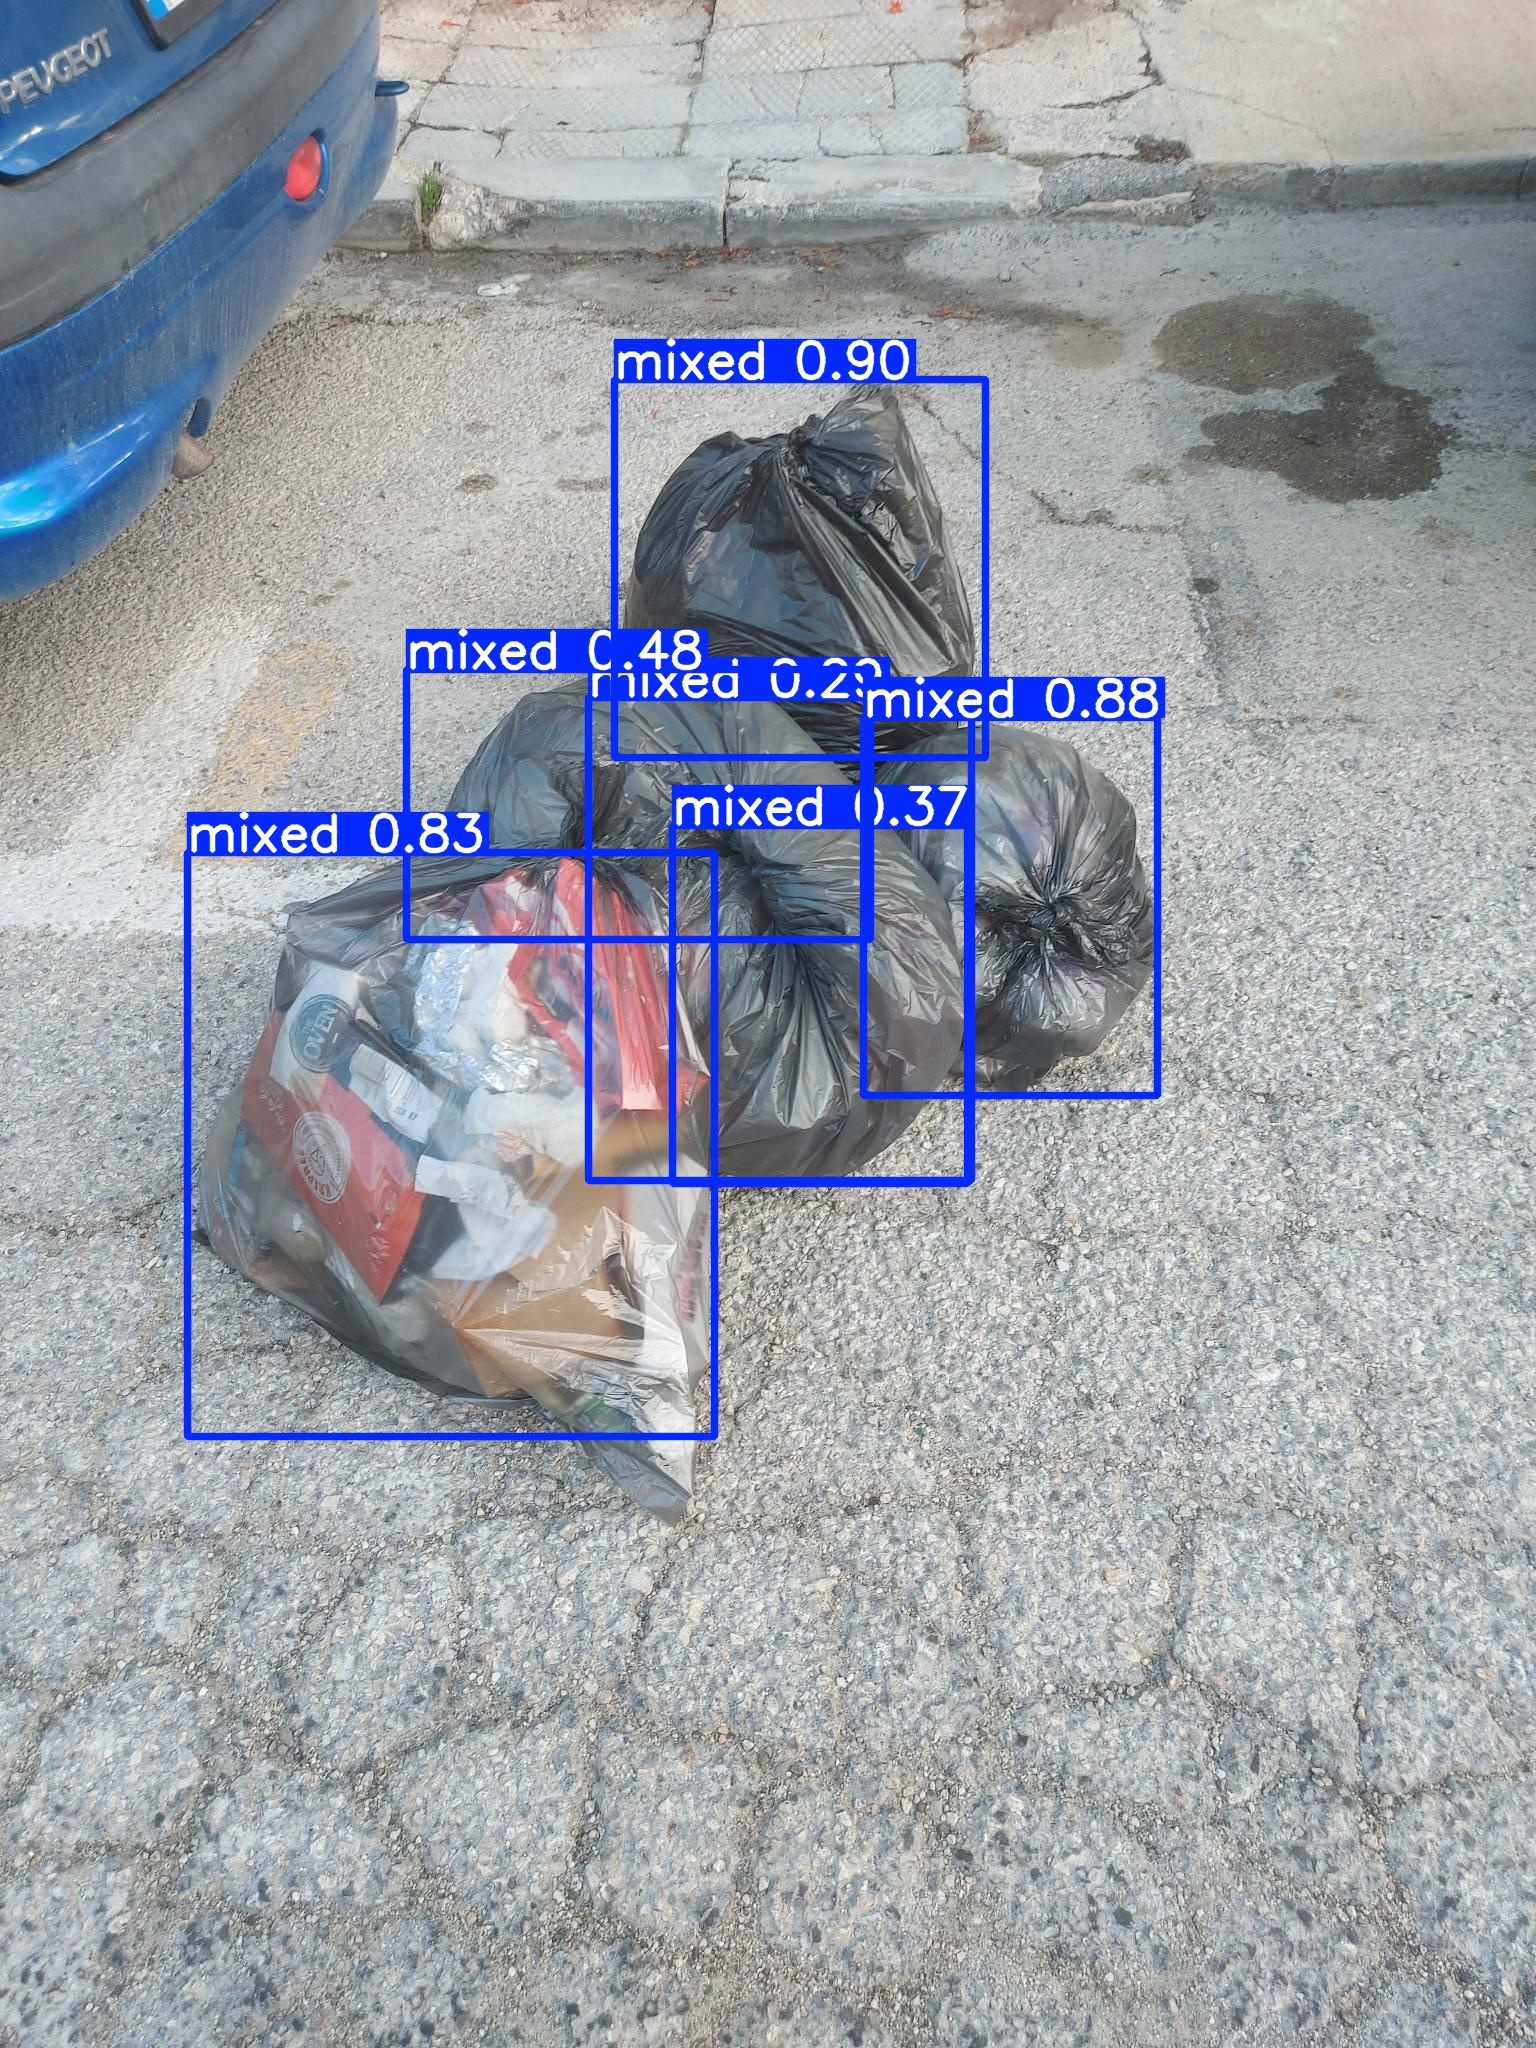

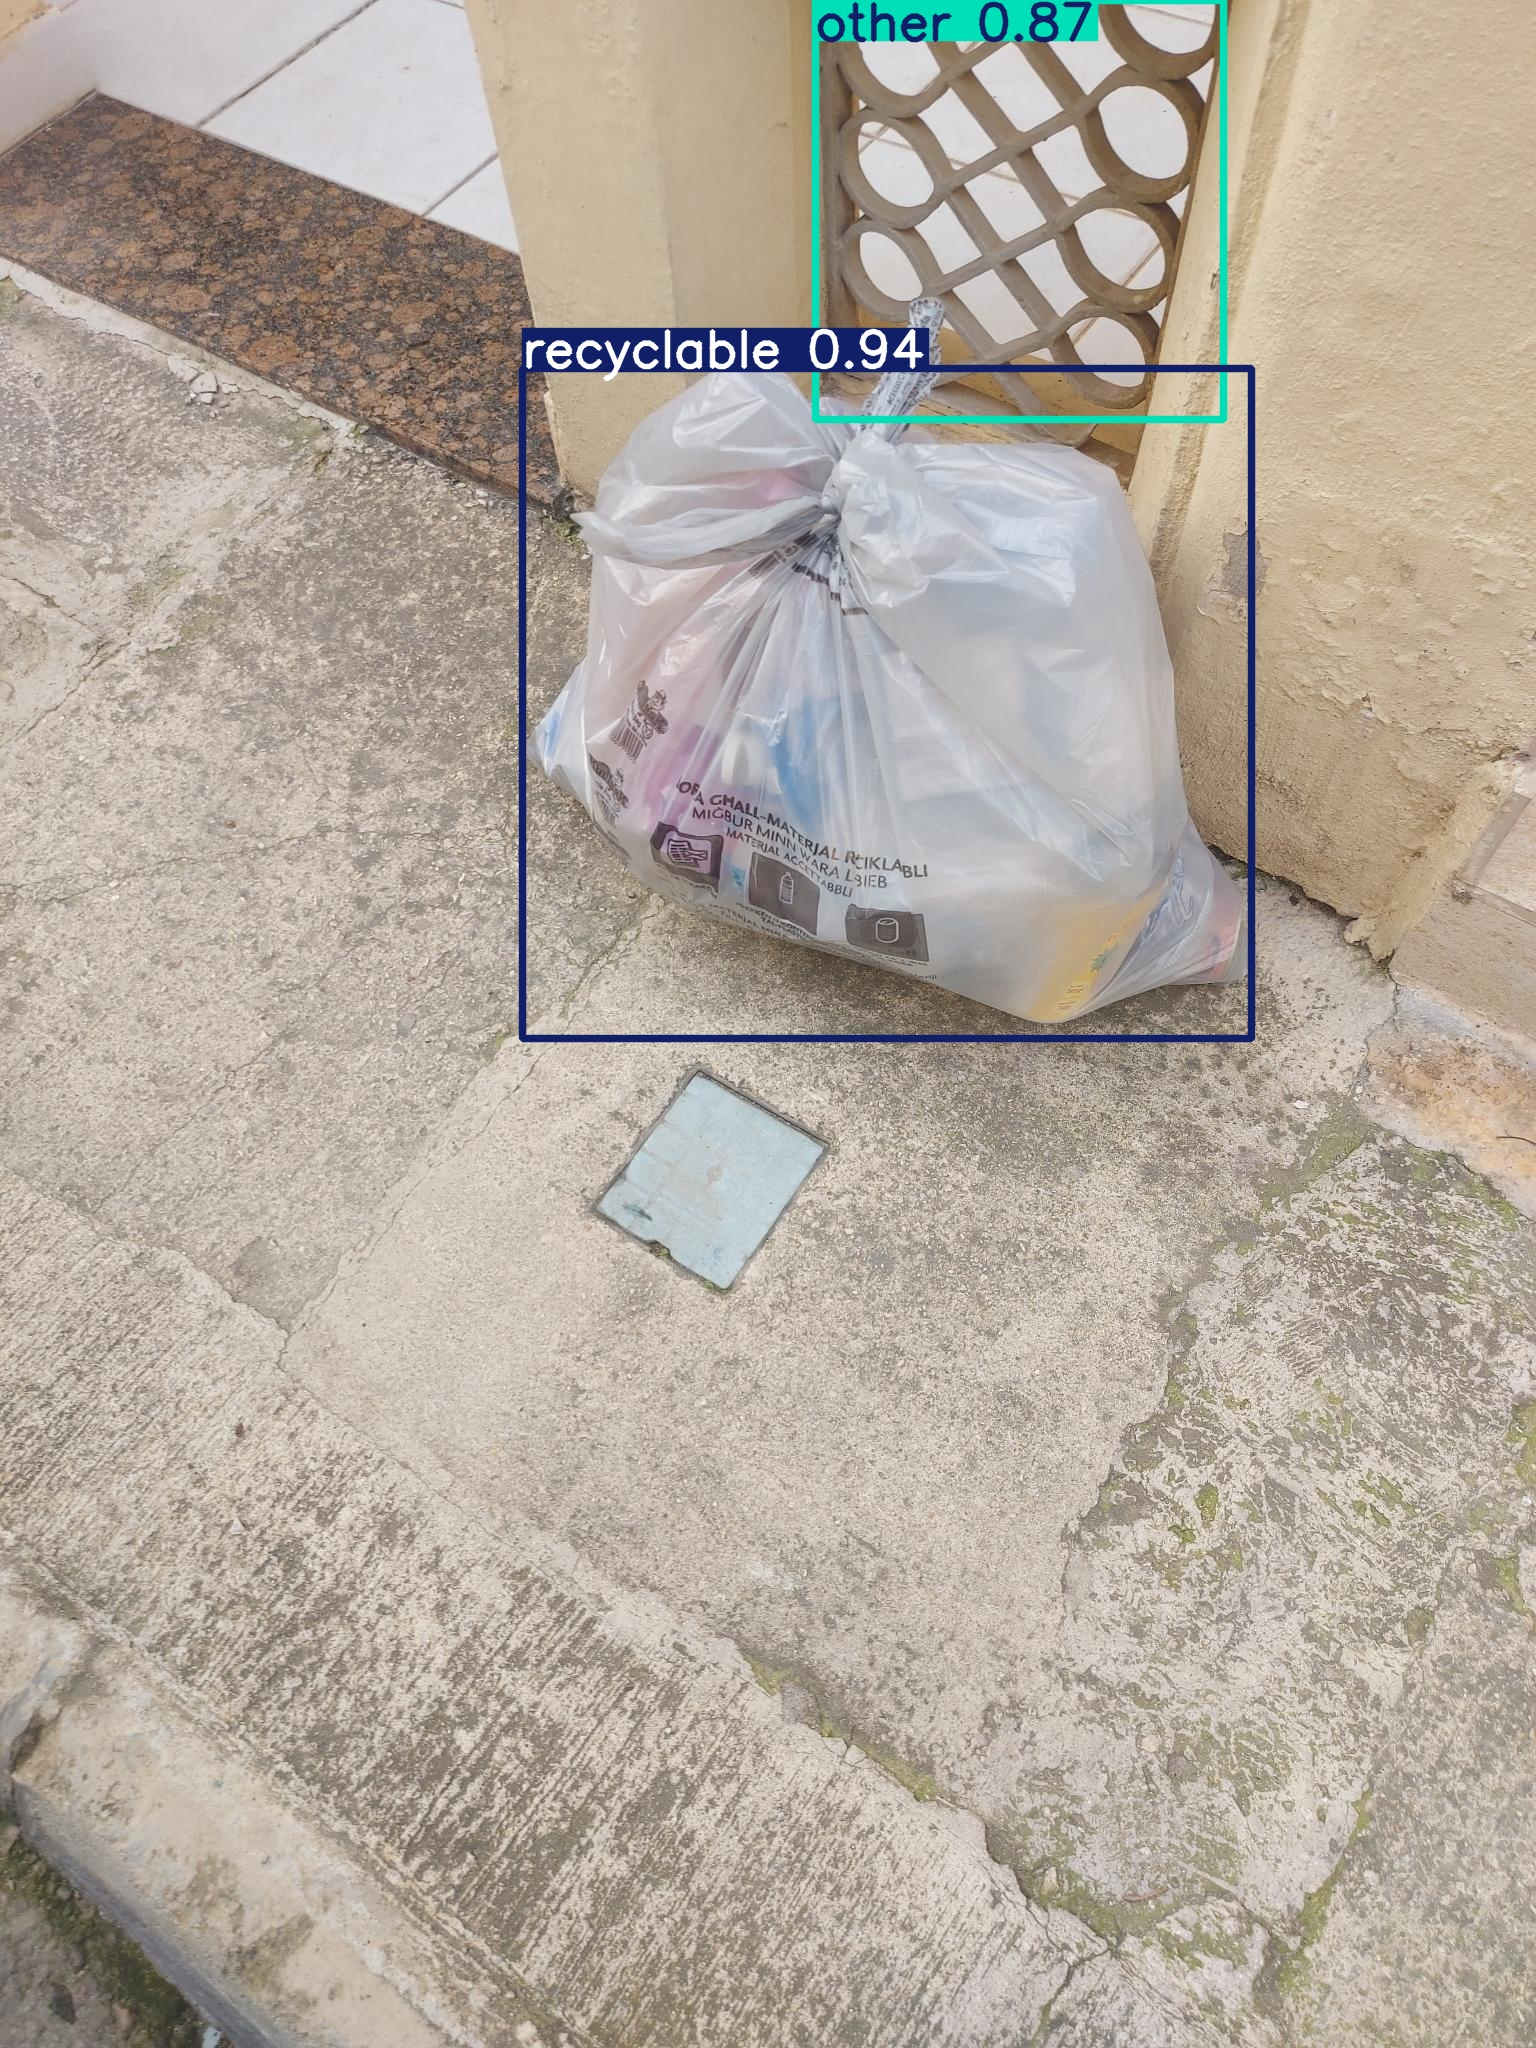

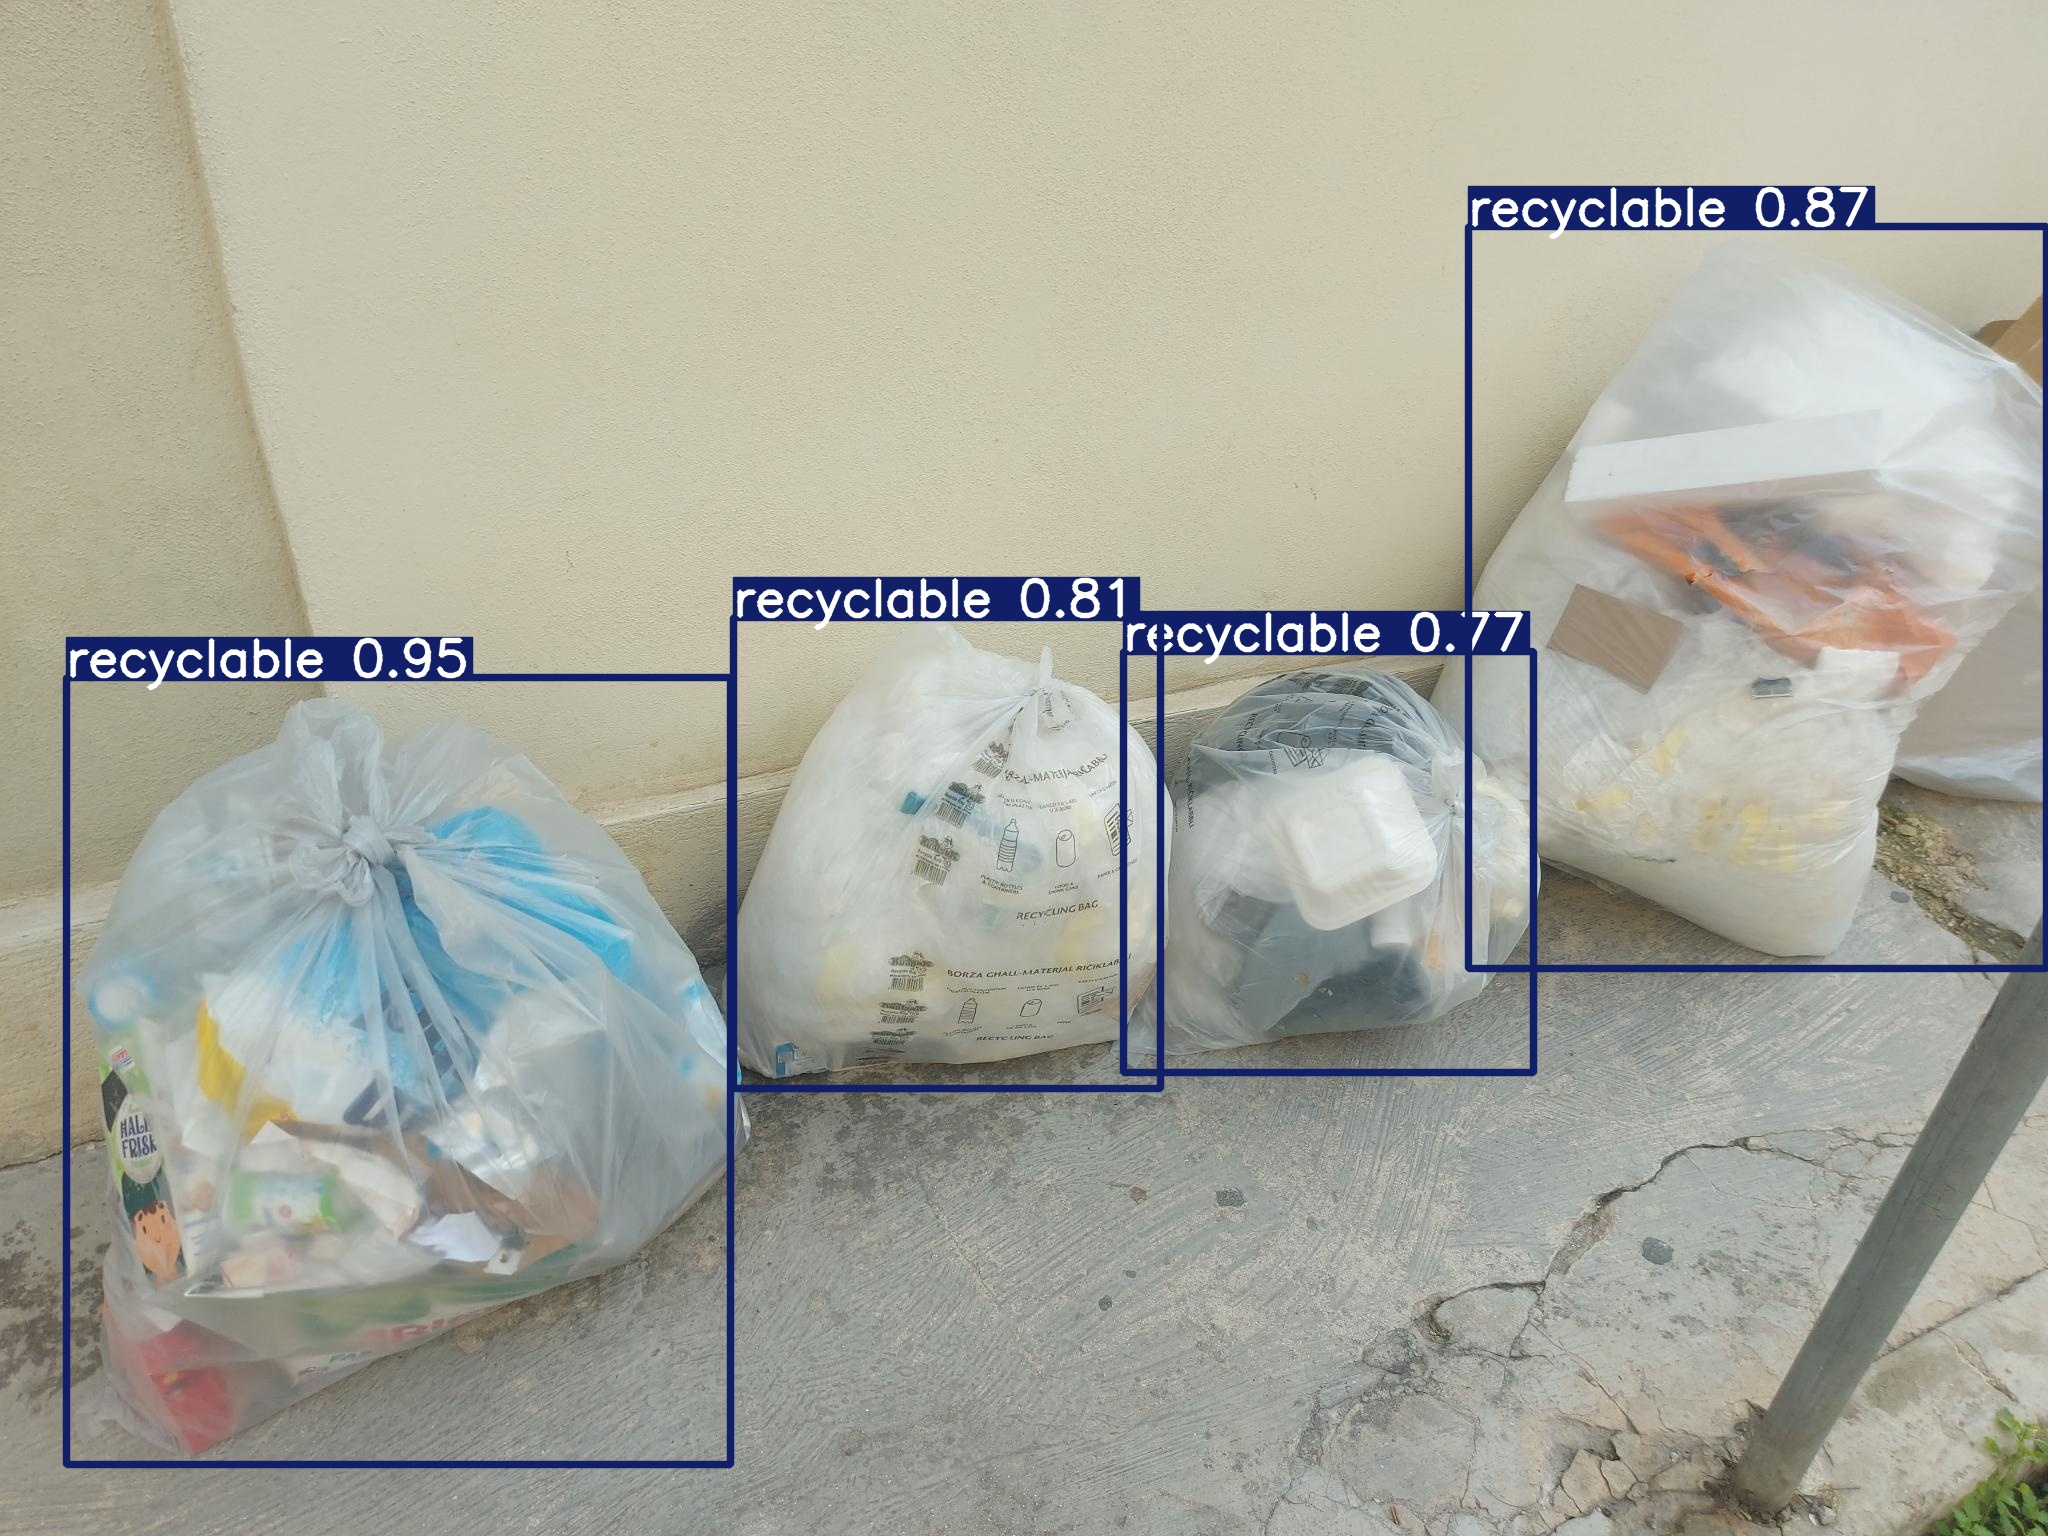

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:6]:
    display(IPyImage(filename=img, width=600))
    print("\n")